# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [77]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [78]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe

#drop all rows where Grad 4 Math entry is missing
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset?

In [79]:
df["YEAR"].max() - df["YEAR"].min()

29

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [80]:
diff = df[df["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean() - df[df["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].mean()
if diff < 0:
    print("OHIO :/")
elif diff > 0:
    print("MICHIGAN :)")
else:
    print("Both states have same average")

OHIO :/


Find the average for your chosen test across all states in 2019

In [81]:
print("Average 4th grade math score across all states in 2019: ", df[df["YEAR"] == 2019]["AVG_MATH_4_SCORE"].mean())

Average 4th grade math score across all states in 2019:  239.9433962264151


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [82]:
df.groupby("STATE")["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [83]:
#combining features
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df['STATE_REVENUE_VS_TOTAL_EXPENDITURE'] = df['STATE_REVENUE'] - df['TOTAL_EXPENDITURE']
df['STATE_REVENUE_VS_INSTRUCTION_EXPENDITURE'] = df['STATE_REVENUE'] - df['INSTRUCTION_EXPENDITURE']

df.head()

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

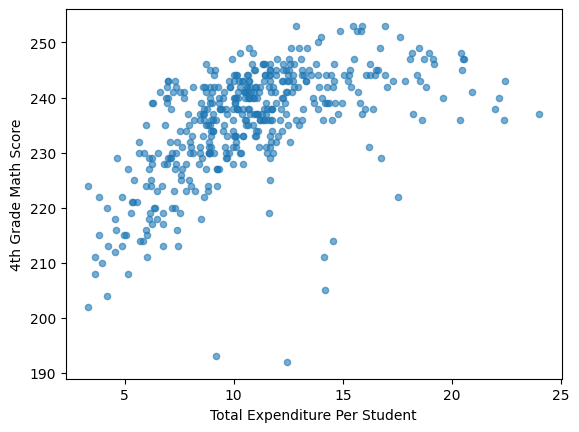

In [84]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Total Expenditure Per Student')
plt.ylabel('4th Grade Math Score')

**4th Grade Math Score VS Total Expenditure Per Student**

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

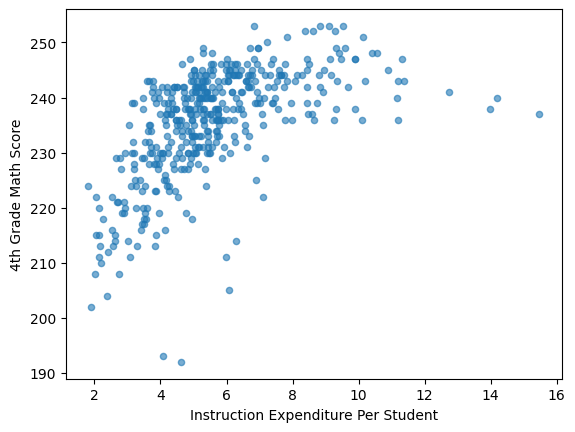

In [85]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure Per Student')
plt.ylabel('4th Grade Math Score')

**4th Grade Math Score VS Total Expenditure Per Student**

Text(0, 0.5, '4th Grade Math Score')

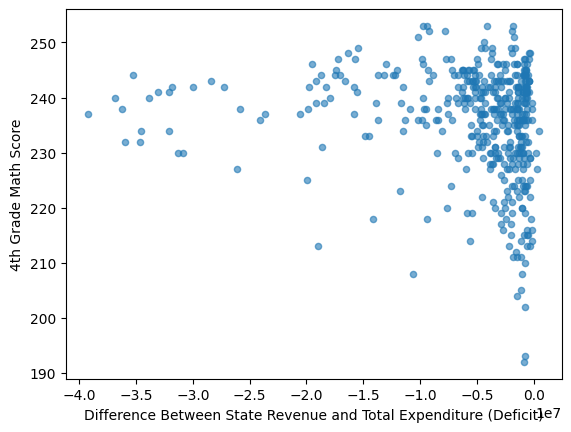

In [87]:
df.plot.scatter(x='STATE_REVENUE_VS_TOTAL_EXPENDITURE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Difference Between State Revenue and Total Expenditure (Deficit)')
plt.ylabel('4th Grade Math Score')

**4th Grade Math Score VS Difference Between State Revenue and Total Expenditure**

Text(0, 0.5, '4th Grade Math Score')

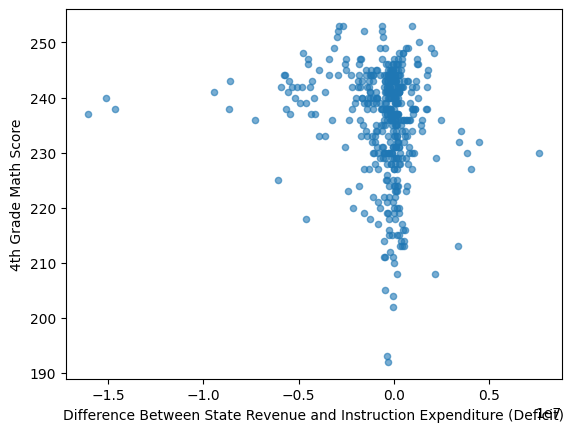

In [88]:
df.plot.scatter(x='STATE_REVENUE_VS_INSTRUCTION_EXPENDITURE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Difference Between State Revenue and Instruction Expenditure (Deficit)')
plt.ylabel('4th Grade Math Score')

**4th Grade Math Score VS Difference Between State Revenue and Instruction Expenditure**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [89]:
from sklearn.model_selection import train_test_split

In [110]:
X = df[['TOTAL_EXPENDITURE_PER_STUDENT','INSTRUCTION_EXPENDITURE_PER_STUDENT', 'STATE_REVENUE_VS_TOTAL_EXPENDITURE', 'STATE_REVENUE_VS_INSTRUCTION_EXPENDITURE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.median(), inplace=True)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [112]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [113]:
# create your model here
model = LinearRegression()

In [114]:
model.fit(X_train, y_train)

LinearRegression()

In [115]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [116]:
# R^2
model.score(X_test, y_test)

0.36637002363459337

In [117]:
# mean error
np.mean(model.predict(X_test)-y_test)

1.1648414189352105

In [118]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

6.579694996266627

In [119]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

8.78126998624945

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

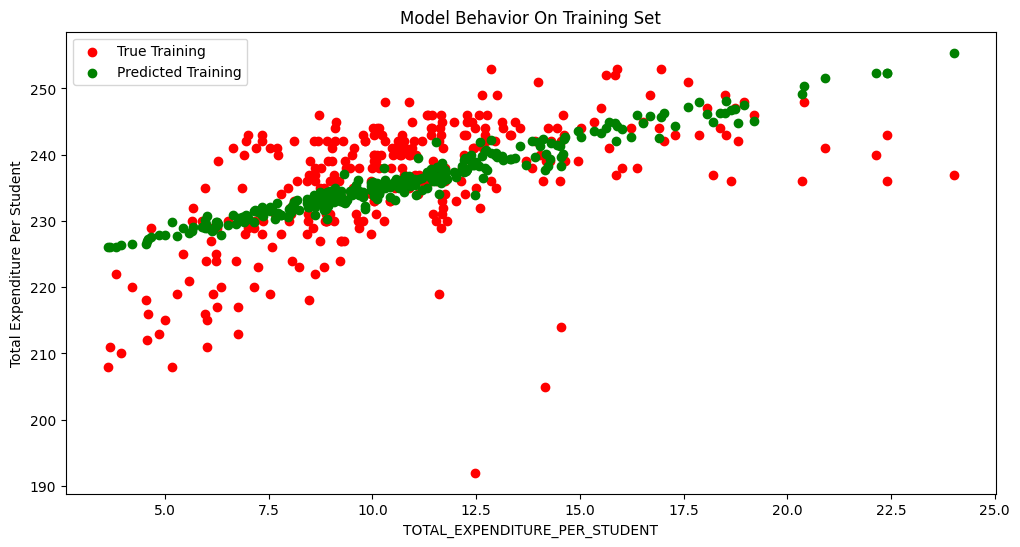

In [123]:
col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Total Expenditure Per Student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

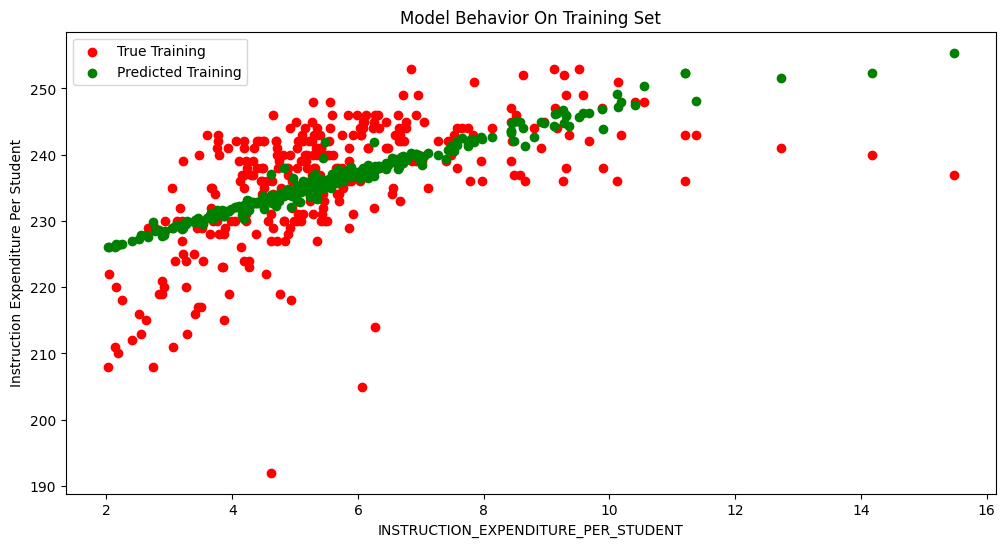

In [124]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Instruction Expenditure Per Student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

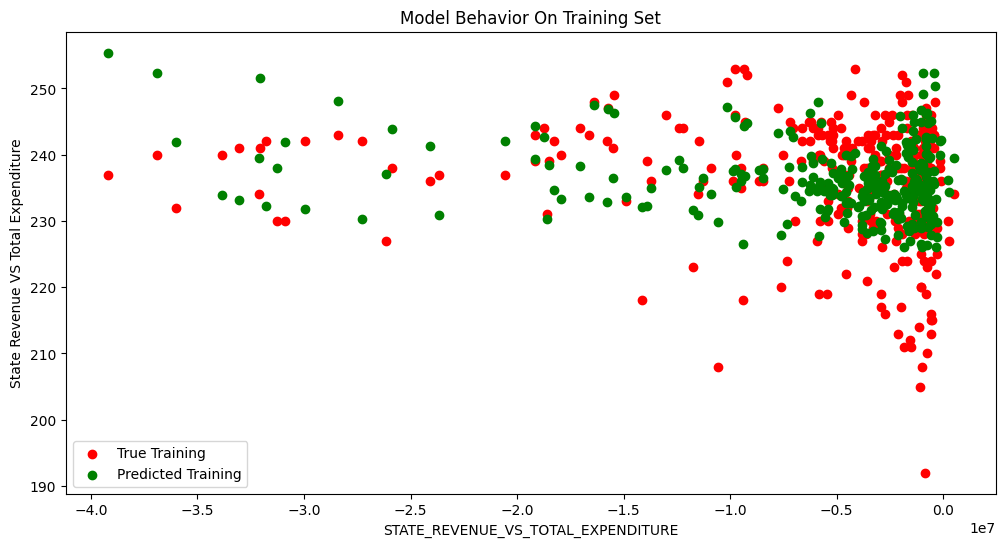

In [125]:
col_name = 'STATE_REVENUE_VS_TOTAL_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('State Revenue VS Total Expenditure')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

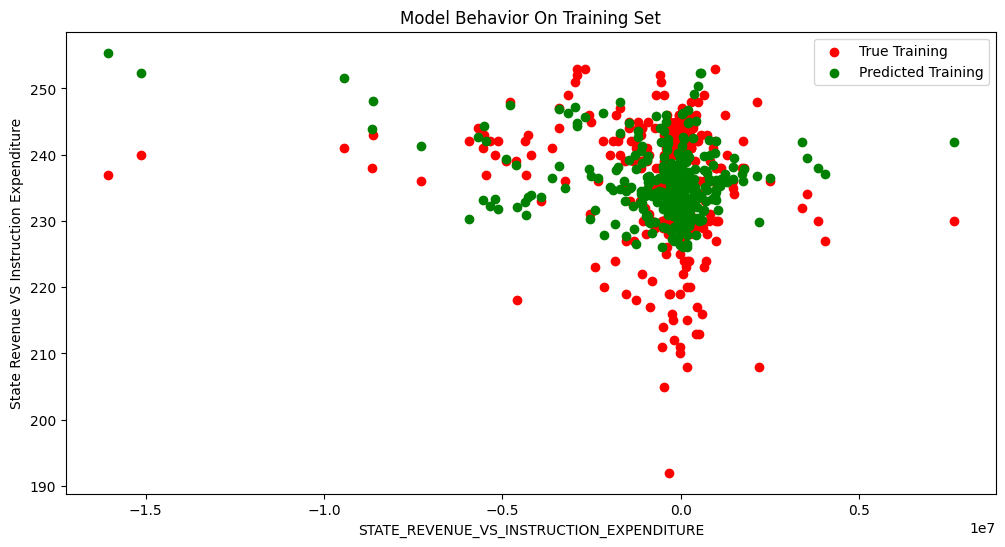

In [126]:
col_name = 'STATE_REVENUE_VS_INSTRUCTION_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('State Revenue VS Instruction Expenditure')
plt.title("Model Behavior On Training Set")

<h2> Summary </h2>

I selected several predictors for my analysis, including total expenditure per student, instruction expenditure per student, the relationship between state revenue and total expenditure (calculated as state revenue minus total expenditure), and the relationship between state revenue and instruction expenditure. I included the latter two predictors with the intention of estimating the financial deficit in these states.

Initially, I hypothesized that these predictors would exhibit a strong correlation with the level of math education in 4th grade. However, my prediction turned out to be incorrect. The linear regression model yielded an r^2 score of 0.36, which indicates less accuracy than expected.

In summary, it was intriguing to discover that the amount of money allocated to education or the financial position of the states does not seem to determine the students' proficiency in math, as reflected in their test scores. Alternatively, it is possible that there may be a correlation, but numerous confounding variables could be affecting the relationship between financial measurements of schools and students' math test scores. Nevertheless, the next step in this analysis will involve considering additional variables and further investigating the reasons behind the results obtained